In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
measures = pd.read_csv("../test_measure.csv")
info = pd.read_csv("../subject-info.csv")


In [27]:
measures.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [21]:
info.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1


Text(0.5, 1.0, 'Average VO2 and VCO2 vs. Time on Treadmill')

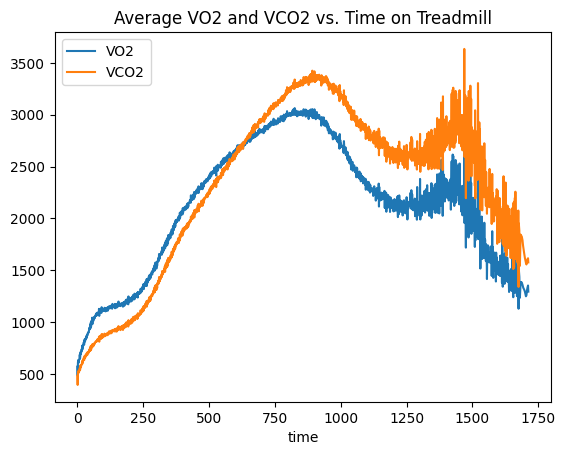

In [22]:
measures.drop(["ID_test","ID"],axis=1).groupby("time")[["VO2","VCO2"]].mean().plot(kind="line")
plt.title("Average VO2 and VCO2 vs. Time on Treadmill")

C:\Users\zcoch\AppData\Local\Temp\ipykernel_46072\2275227915.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  joined.drop(["ID","ID_test"],axis=1).groupby("ageBins").mean()["VO2Max"].plot(kind="bar")


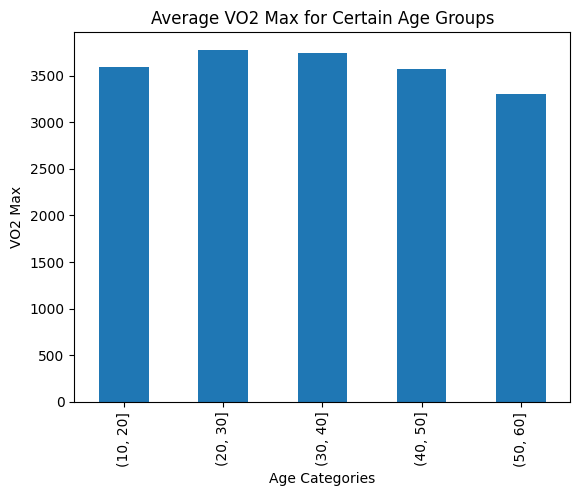

In [29]:
joined = pd.merge(info, measures,on=["ID","ID_test"])
vo2max = joined.drop(["ID_test"],axis=1).groupby("ID")[["VO2"]].max().reset_index().rename({"VO2":"VO2Max"},axis=1)
joined = pd.merge(joined,vo2max,on="ID")
#age binning
joined["Age"] = joined["Age"].round(0)
ageBins = np.arange(10,66,10)
joined["ageBins"] = pd.cut(joined["Age"],ageBins)
joined.drop(["ID","ID_test"],axis=1).groupby("ageBins").mean()["VO2Max"].plot(kind="bar")
plt.ylabel("VO2 Max")
plt.xlabel("Age Categories")
plt.title("Average VO2 Max for Certain Age Groups")
plt.savefig("VO2MaxByAge.png")

C:\Users\zcoch\AppData\Local\Temp\ipykernel_46072\625494814.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = joined.groupby(['ageBins', 'timeBins'])[['VO2']].mean().reset_index()


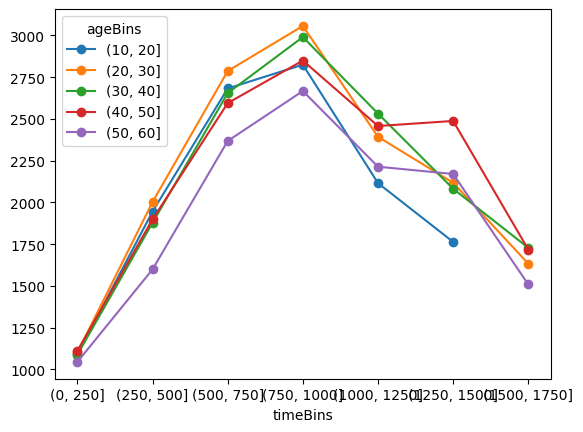

In [28]:
time_bins = np.arange(0, 1751, 250)  # [0, 250, 500, ..., 1750]

# 2. Create a new column 'timeBins'
joined['timeBins'] = pd.cut(joined['time'], bins=time_bins)

# 3. Group by both binned age and binned time
grouped = joined.groupby(['ageBins', 'timeBins'])[['VO2']].mean().reset_index()

# 4. Pivot so each ageBin becomes a separate line in the plot
pivot_df = grouped.pivot(index='timeBins', columns='ageBins', values='VO2')

# 5. Plot
pivot_df.plot(kind='line', marker='o')
plt.savefig("VO2OverTimeByAge.png")